## CLIM 680 Assignment #2
Douglas Nedza
October 21, 2020

Create and use a function.

Create a 12-panel plot of the monthly climatology of my data.  Create at least 1 github issue for something that could improve the visual appeal of the plots.

Upload the environment.yml file to Github.  Check that the previous assignment runs under that environment (done).

In [1]:
##Import necessary python libraries
import warnings;

import numpy as np; ##Numerical Calculations
import xarray as xr; ##Read netcdf files
import pandas as pd;
import matplotlib.pyplot as plt; ##Plotting

import cartopy.crs as ccrs;
import cartopy.mpl.ticker as cticker;
from cartopy.util import add_cyclic_point

## Create a Function

In [2]:
##This function inputs a dataset and outputs monthly climatologies
def monthly_clim( ds ):
    return ds.groupby( 'time.month' ).mean( dim = 'time' );

## Data
The dataset I have chosen for this analysis will be ocean surface temperature data (tos) taken from pre-industrial model runs contained in the CMIP5 dataset.

Due to the multiude of models available for this dataset, only GFDL's CM3 model will be considered.

This dataset is contained on the COLA server at:/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1

The data is stored in 100 files containing 5 years of data, for a total run length of 500 years. The data is stored using the NetCDF file format.

In [3]:
## Read dataset into notebook   
path = '/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1/';
file = 'tos_Omon_GFDL-CM3_piControl_r1i1p1_*.nc';
#dataset = xr.open_dataset( path + file )
dataset = xr.open_mfdataset( ( path + file ), concat_dim = 'time' );
print( dataset );
## Note that there is no units attribute for this file.

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * rlon          (rlon) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 200, 360), meta=np.ndarray>
    time_bnds     (time, bnds) object das

In [5]:
##Note that the longitudes of this dataset are shifted
new_rlon = ( dataset['rlon'] + 360 ) % 360;
dataset = dataset.assign_coords( rlon = new_rlon );
dataset = dataset.sortby( dataset['rlon'] );
print( dataset );

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, time: 6000, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00
  * rlon          (rlon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(60,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(60,), meta=np.ndarray>
    tos           (time, rlat, rlon) float32 dask.array<chunksize=(60, 200, 360), meta=np.ndarray>
    time_bnds     (time, bnds) object da

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/h

## Create the Monthly Climatologies using the defined function


In [6]:
dataset_month = monthly_clim( dataset );
print( dataset_month );

<xarray.Dataset>
Dimensions:       (bnds: 2, month: 12, rlat: 200, rlon: 360, vertices: 4)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * rlon          (rlon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    average_DT    (month) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (month, rlat, rlon) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
    lat_vertices  (month, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 200, 360, 4), meta=np.ndarray>
    lon_vertices  (month, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 200, 360, 4), meta=

## Create a set of subplots that span each monthly climatology

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarni

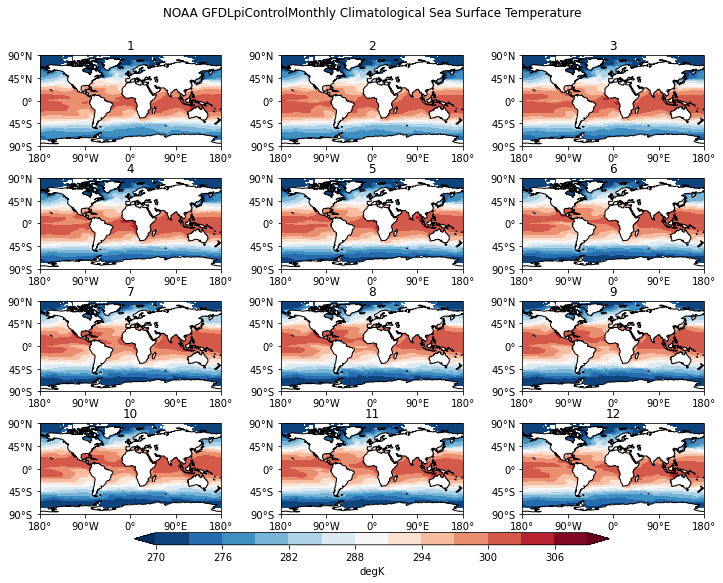

In [21]:
clevs = np.arange( 270, 310, 3 );

fig,axs = plt.subplots( nrows = 4, ncols = 3,
                      subplot_kw = {'projection':ccrs.PlateCarree() },
                      figsize = ( 11, 8.5) );
axs = axs.flatten();

for i,mon in enumerate(  dataset_month['month'] ):
    cs = axs[i].contourf( dataset_month['rlon'], dataset_month['rlat'],
                        dataset_month['tos'].sel( month = mon ),
                        clevs, transform = ccrs.PlateCarree(),
                        cmap = 'RdBu_r', extend = 'both' );
    #Longitude Labels
    axs[i].set_xticks( np.arange( -180, 181, 90 ), crs = ccrs.PlateCarree() );
    lon_formatter = cticker.LongitudeFormatter();
    axs[i].xaxis.set_major_formatter( lon_formatter );
    
    #Latitude Labels 
    axs[i].set_yticks( np.arange( -90, 91, 45 ), crs = ccrs.PlateCarree() );
    lat_formatter = cticker.LatitudeFormatter();
    axs[i].yaxis.set_major_formatter( lat_formatter );
    
    axs[i].coastlines();
    axs[i].set_title( mon.values );

#Reduce space between figures and leave space for a colorbar
fig.subplots_adjust( bottom = 0.15, top = 0.9,
                  left = 0.05, right = 0.95,
                  wspace = 0.05, hspace = 0.35)
cbar_ax = fig.add_axes( [0.2, 0.1, 0.6, 0.02] );
cbar = fig.colorbar( cs, cax = cbar_ax, orientation = 'horizontal',
                   label = 'degK' );
plt.suptitle( dataset.attrs['institute_id'] + ' ' + dataset.attrs['experiment_id'] + ' ' + 'Monthly Climatological Sea Surface Temperature' );